In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = [16, 9]


def plot3d(states, *, title='Chua circuit'):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlabel('Voltage on capacitor C1')
    ax.set_ylabel('Voltage on capacitor C2')
    ax.set_zlabel('Current in inductor L1')
    ax.set_title(title)

    ax.scatter(states[0,0], states[0,1], states[0,2], s=40, color='g', label='starting point')
    print('Starting point: ', states[0,0], states[0,1], states[0,2])
    print('Ending point:   ', states[-1,0], states[-1,1], states[-1,2])

    ax.plot(states[:,0], states[:,1], states[:,2])
    ax.legend()
    plt.show() 

In [2]:
def nonlinear_resistor(x):
    if x < -0.5:
        return -0.5 * x + 0.5
    elif -0.5 <= x <= 0.5:
        return -x
    else:
        return -0.5 * x - 0.5


def chua(t, *, initial_state=(0.7, 0.0, 0.0), alpha=15.0, beta=30.0, r=1, c=1, f=nonlinear_resistor):

    def _chua(state, t):
        x0, y0, z0 = state
        x1 = alpha * (y0 - x0 - f(x0))
        y1 = (x0 - y0 + r * z0) / (r * c)
        z1 = -beta * y0
        return x1, y1, z1

    return odeint(_chua, initial_state, t)

Start point:  0.7 0.0 0.0
End point:    1.14349839455 0.178428124256 -0.372791586373


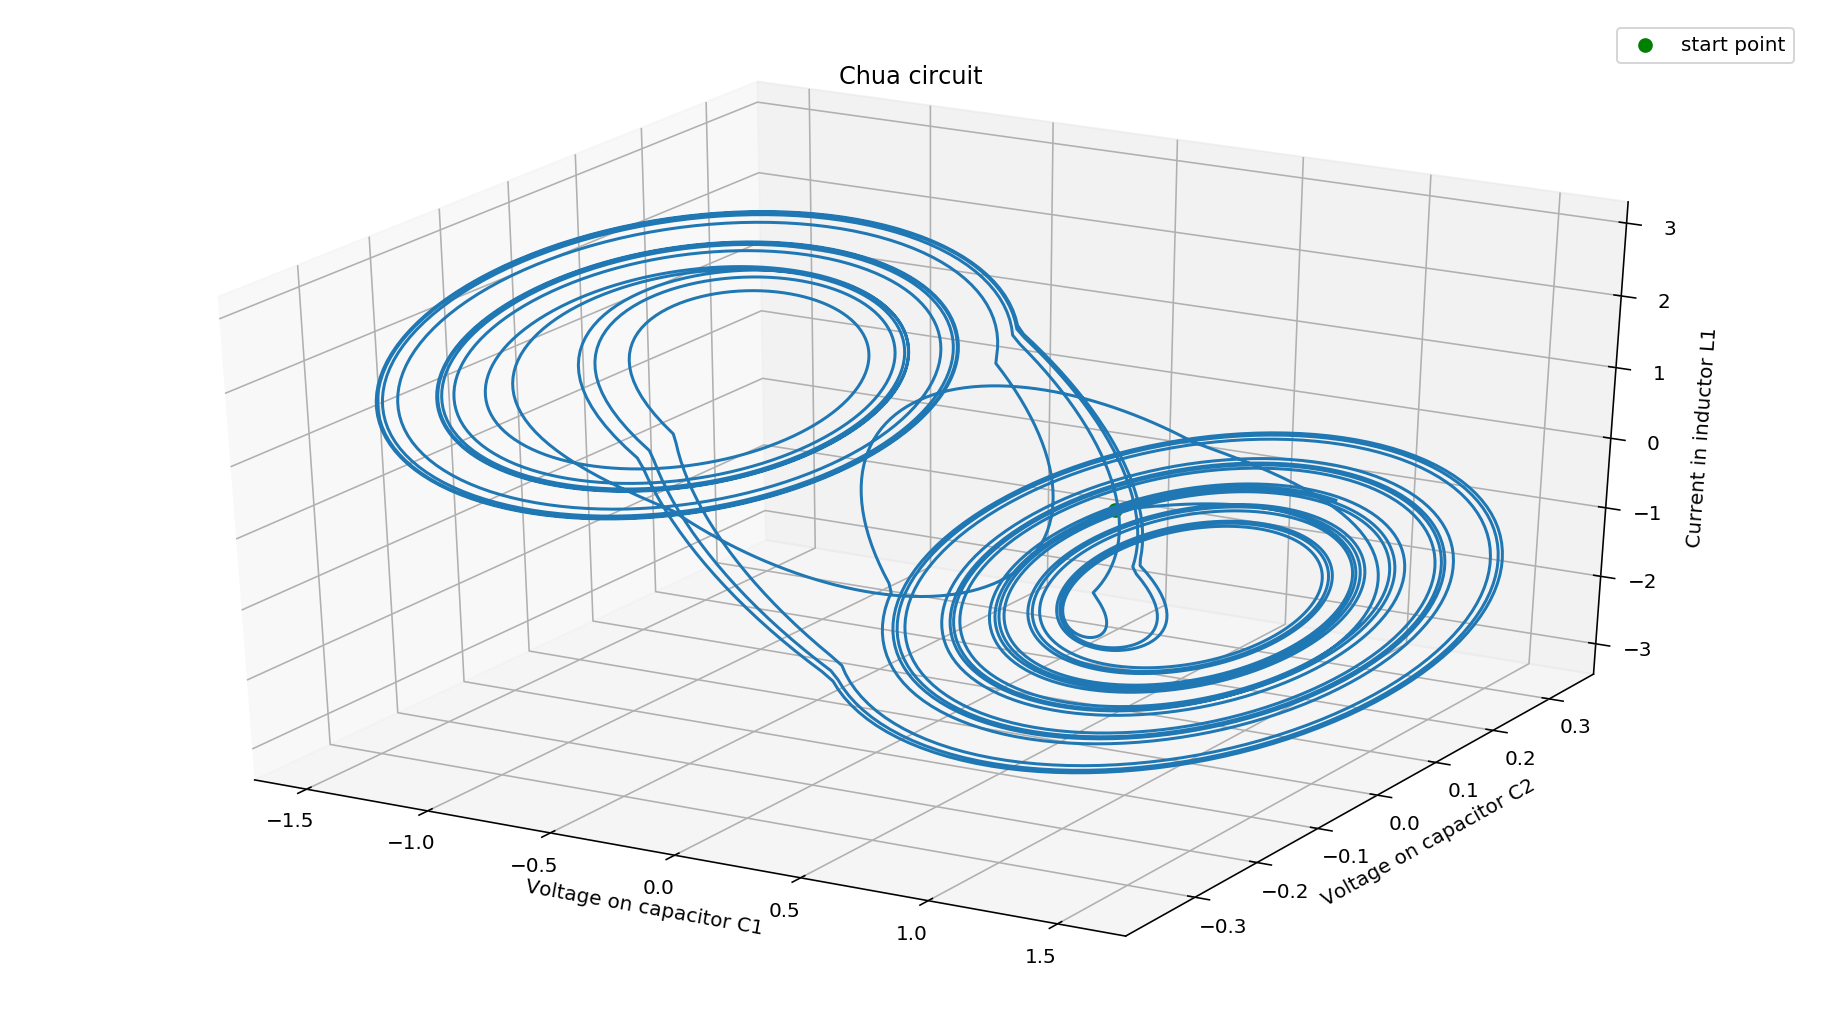

In [3]:
plot3d(chua(np.arange(0.0, 40.0, 0.01)))

Start point:  0.7 0.0 0.0
End point:    -4.66703288714e-07 -9.3696187096e-07 3.85040675982e-07


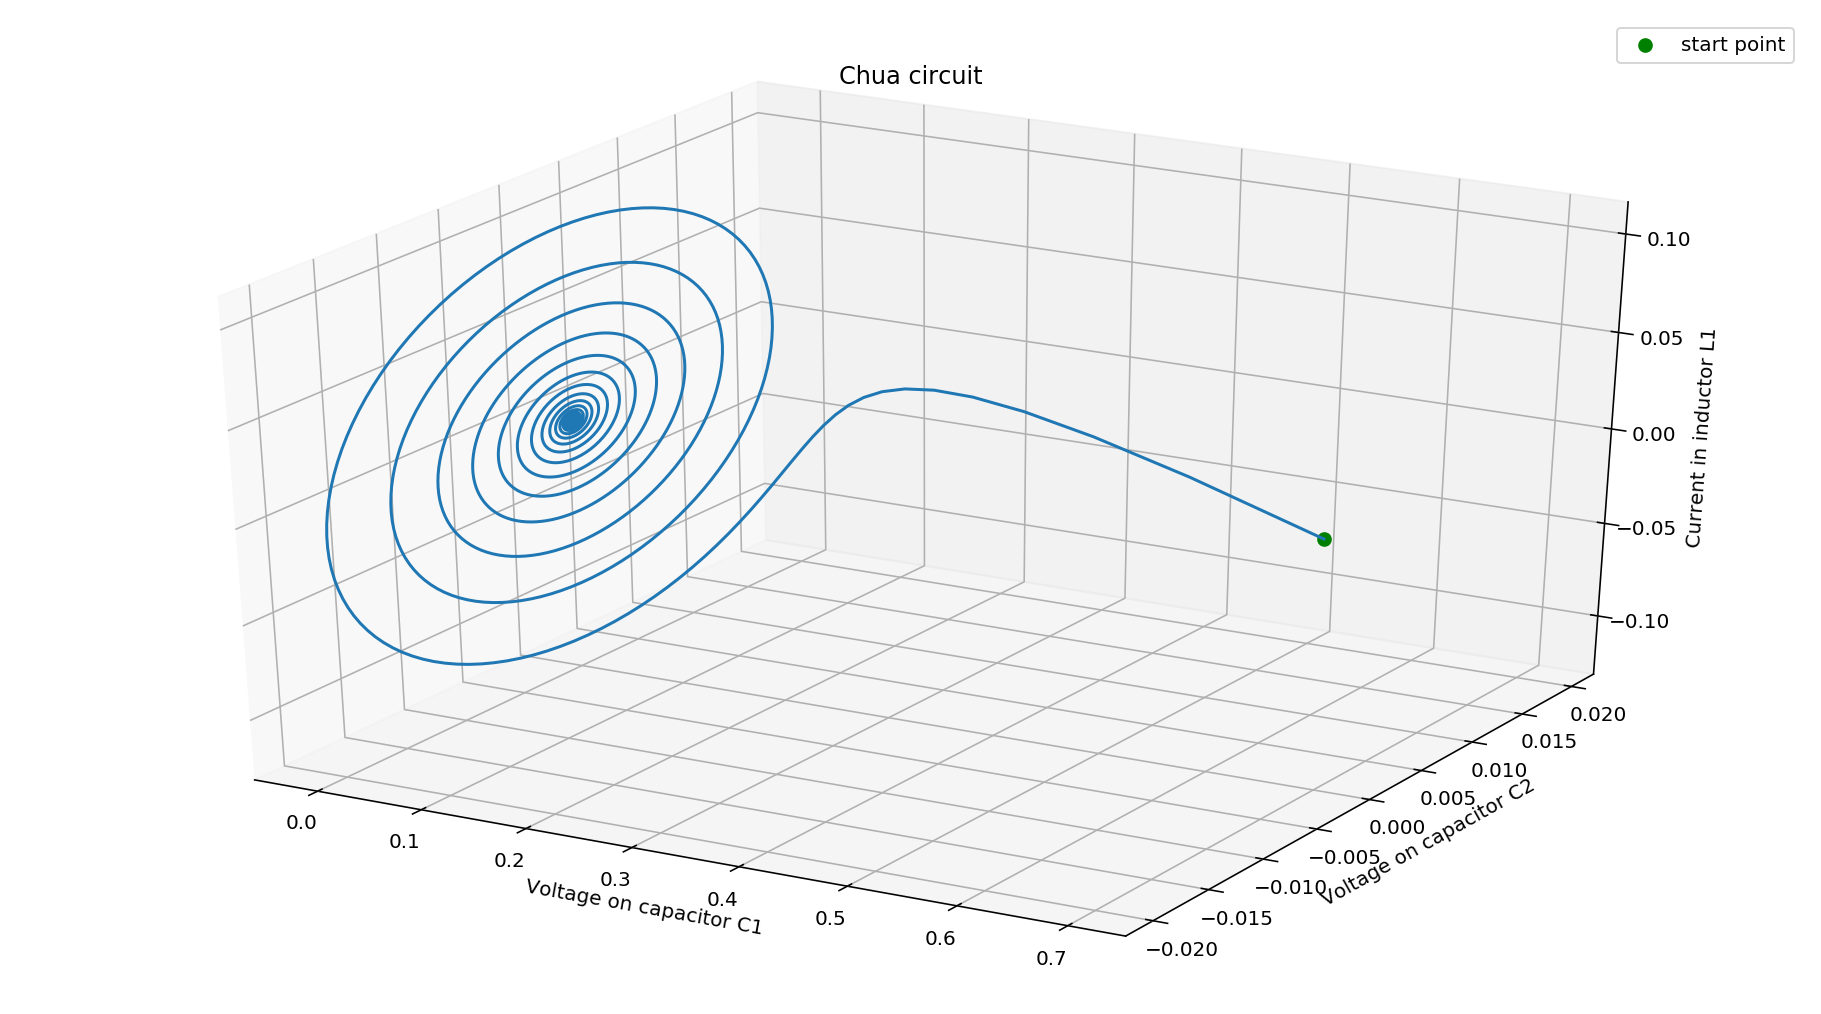

In [4]:
plot3d(chua(np.arange(0.0, 40.0, 0.01), f=lambda x: x))

Start point:  0.7 0.0 0.0
End point:    1.00000036949 1.18664703199e-06 -0.999999175271


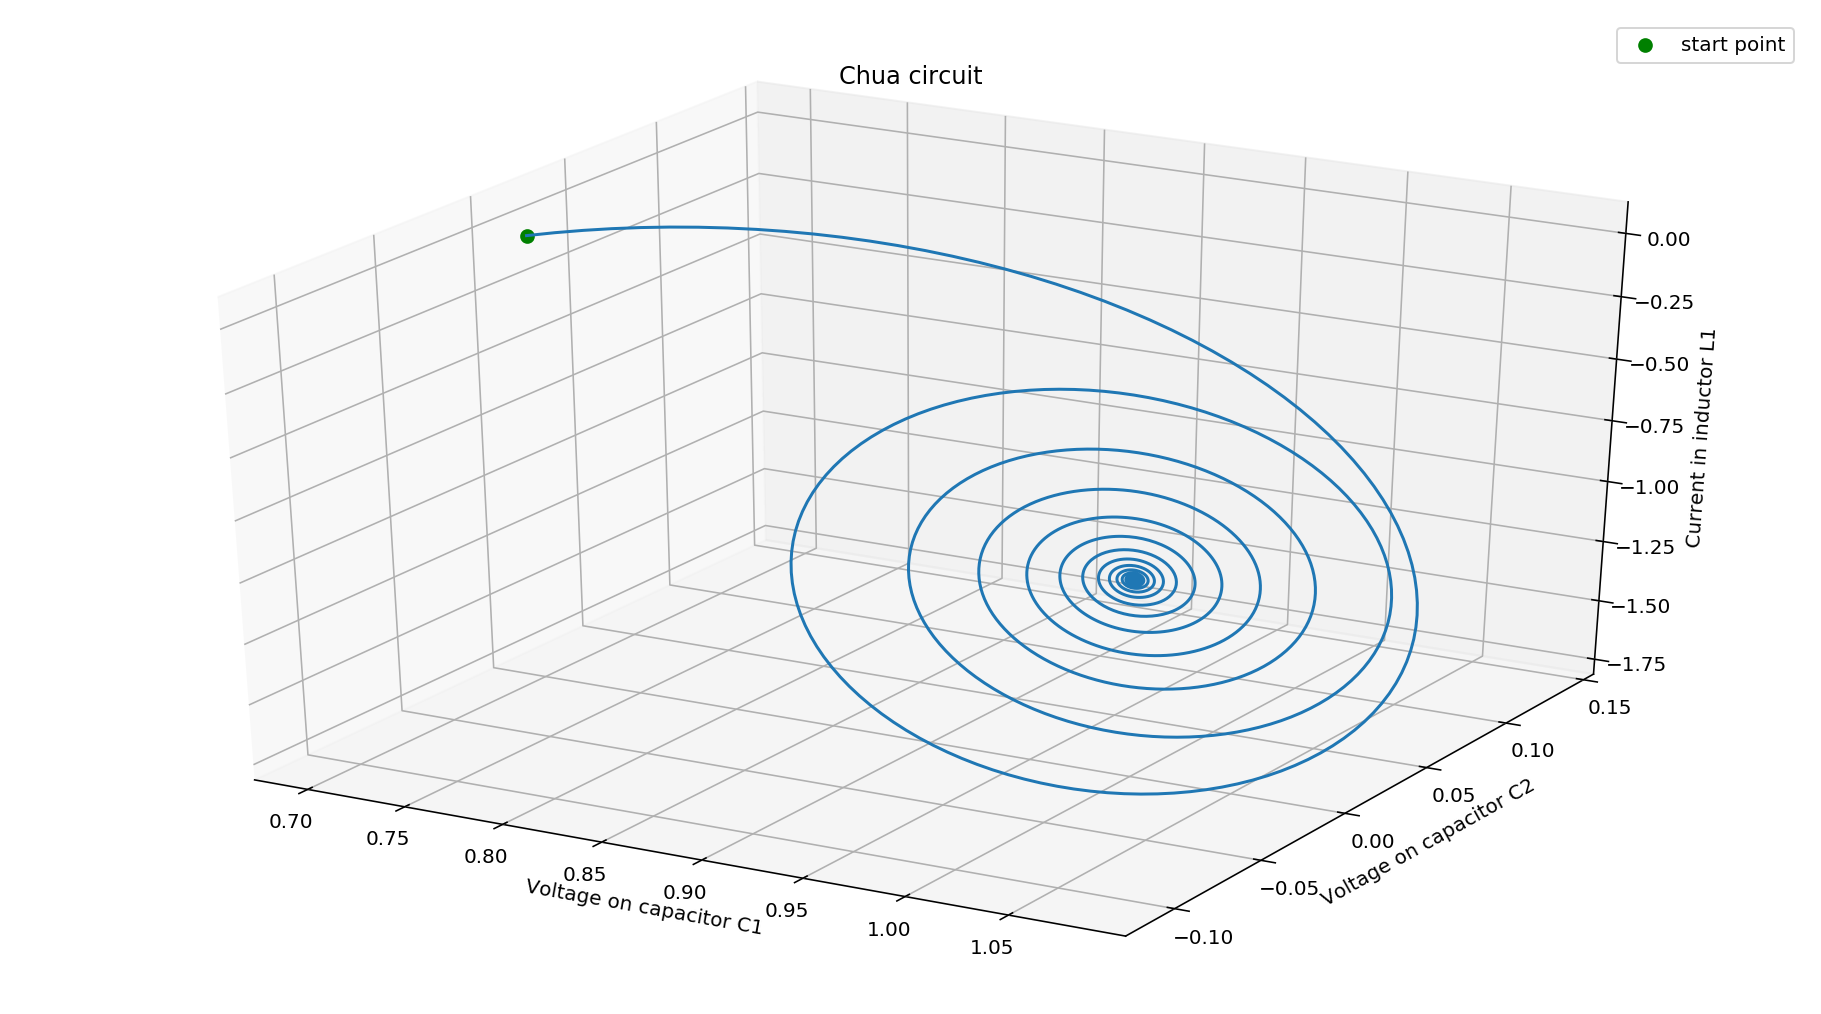

In [5]:
plot3d(chua(np.arange(0.0, 40.0, 0.01), alpha=5))

In [6]:
from itertools import repeat

plt.rcParams["figure.figsize"] = [16, 27]


def bifurcation(t, parameter, parameter_values, *, threshold=100, alpha=15.0, beta=30.0):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

    ax1.set_title(f'Bifurcation diagram of voltage evolution on C1 depending on {parameter} parameter')
    ax1.set_xlabel(f'{parameter} parameter')
    ax1.set_ylabel('Voltage on capacitor C1')

    ax2.set_title(f'Bifurcation diagram of voltage evolution on C2 depending on {parameter} parameter')
    ax2.set_xlabel(f'{parameter} parameter')
    ax2.set_ylabel('Voltage on capacitor C2')

    ax3.set_title(f'Bifurcation diagram of current evolution in L1 depending on {parameter} parameter')
    ax3.set_xlabel(f'{parameter} parameter')
    ax3.set_ylabel('Current in inductor L1')

    for param_val in parameter_values:
        values = {'alpha': alpha, 'beta': beta, parameter: param_val}
        states = chua(t, **values)
        xs = list(set(states[threshold:, 0]))
        ys = list(set(states[threshold:, 1]))
        zs = list(set(states[threshold:, 2]))

        ax1.scatter(list(repeat(param_val, len(xs))), xs, s=0.05, color='black')
        ax2.scatter(list(repeat(param_val, len(ys))), ys, s=0.05, color='black')
        ax3.scatter(list(repeat(param_val, len(zs))), zs, s=0.05, color='black')

    plt.show()

# Bifurcation diagram of system evolution depending on `alpha` parameter

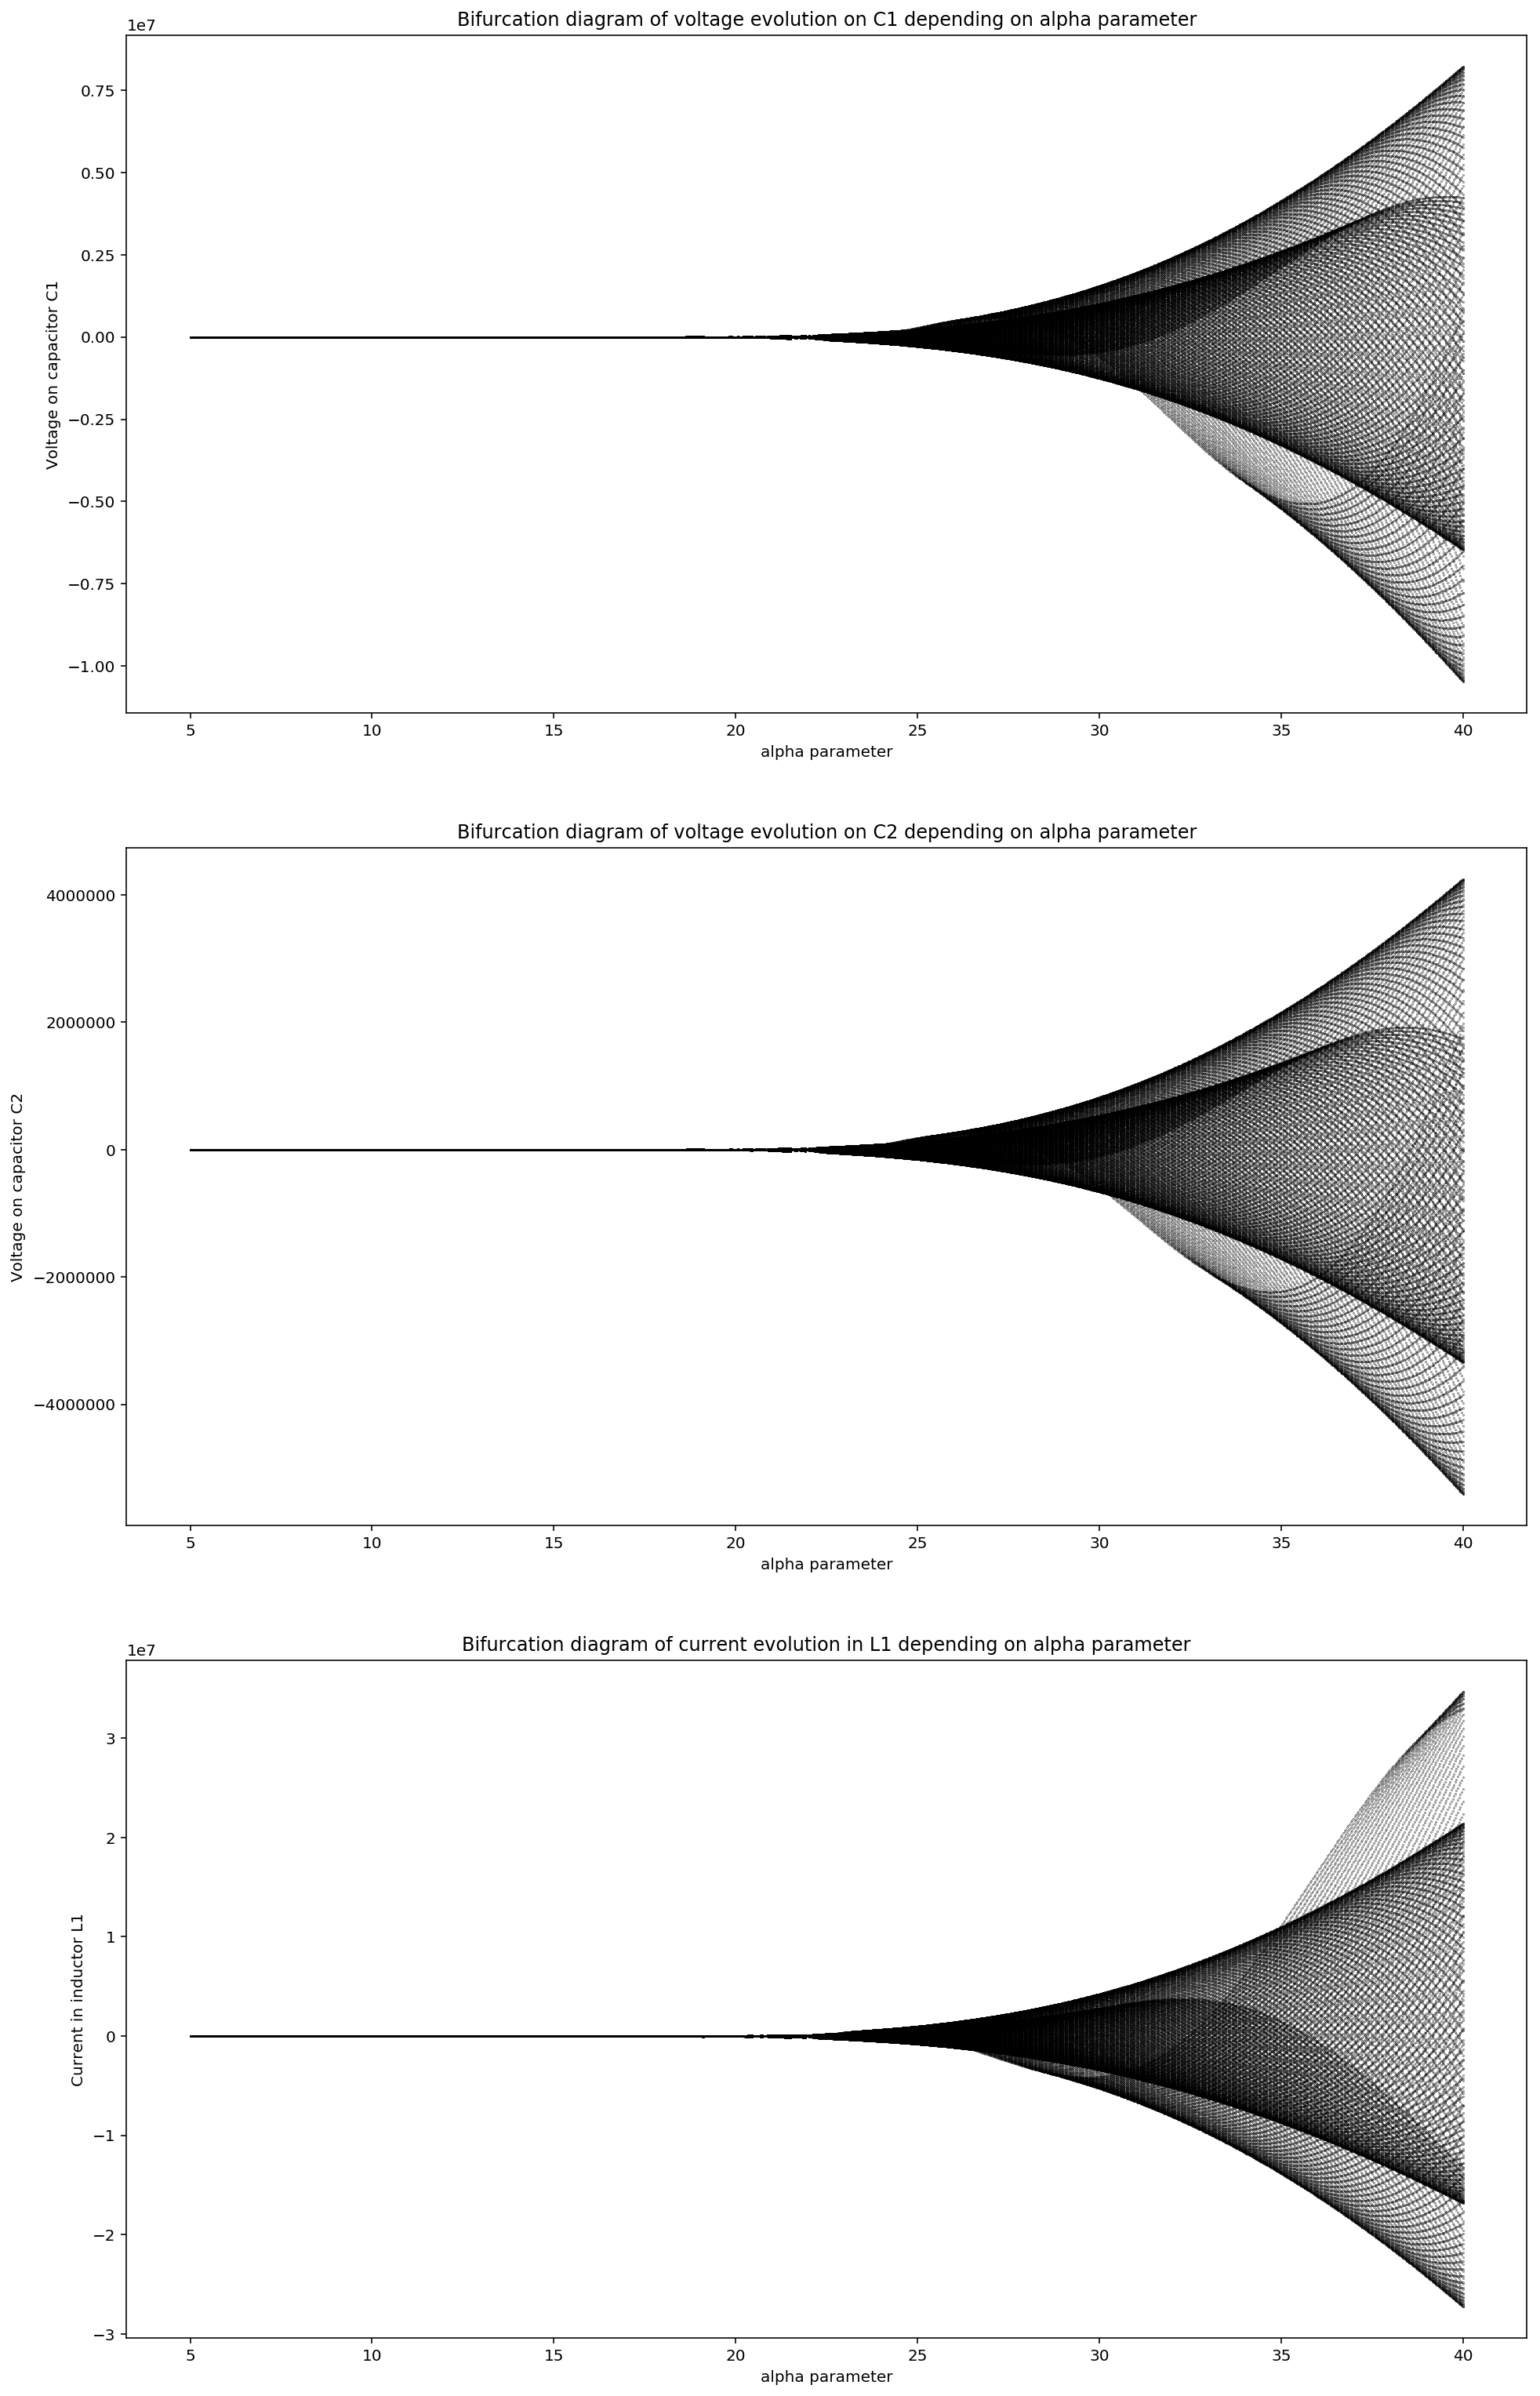

In [7]:
bifurcation(np.arange(0.0, 40.0, 0.01), 'alpha', np.linspace(5, 40, 1000), threshold=3800)

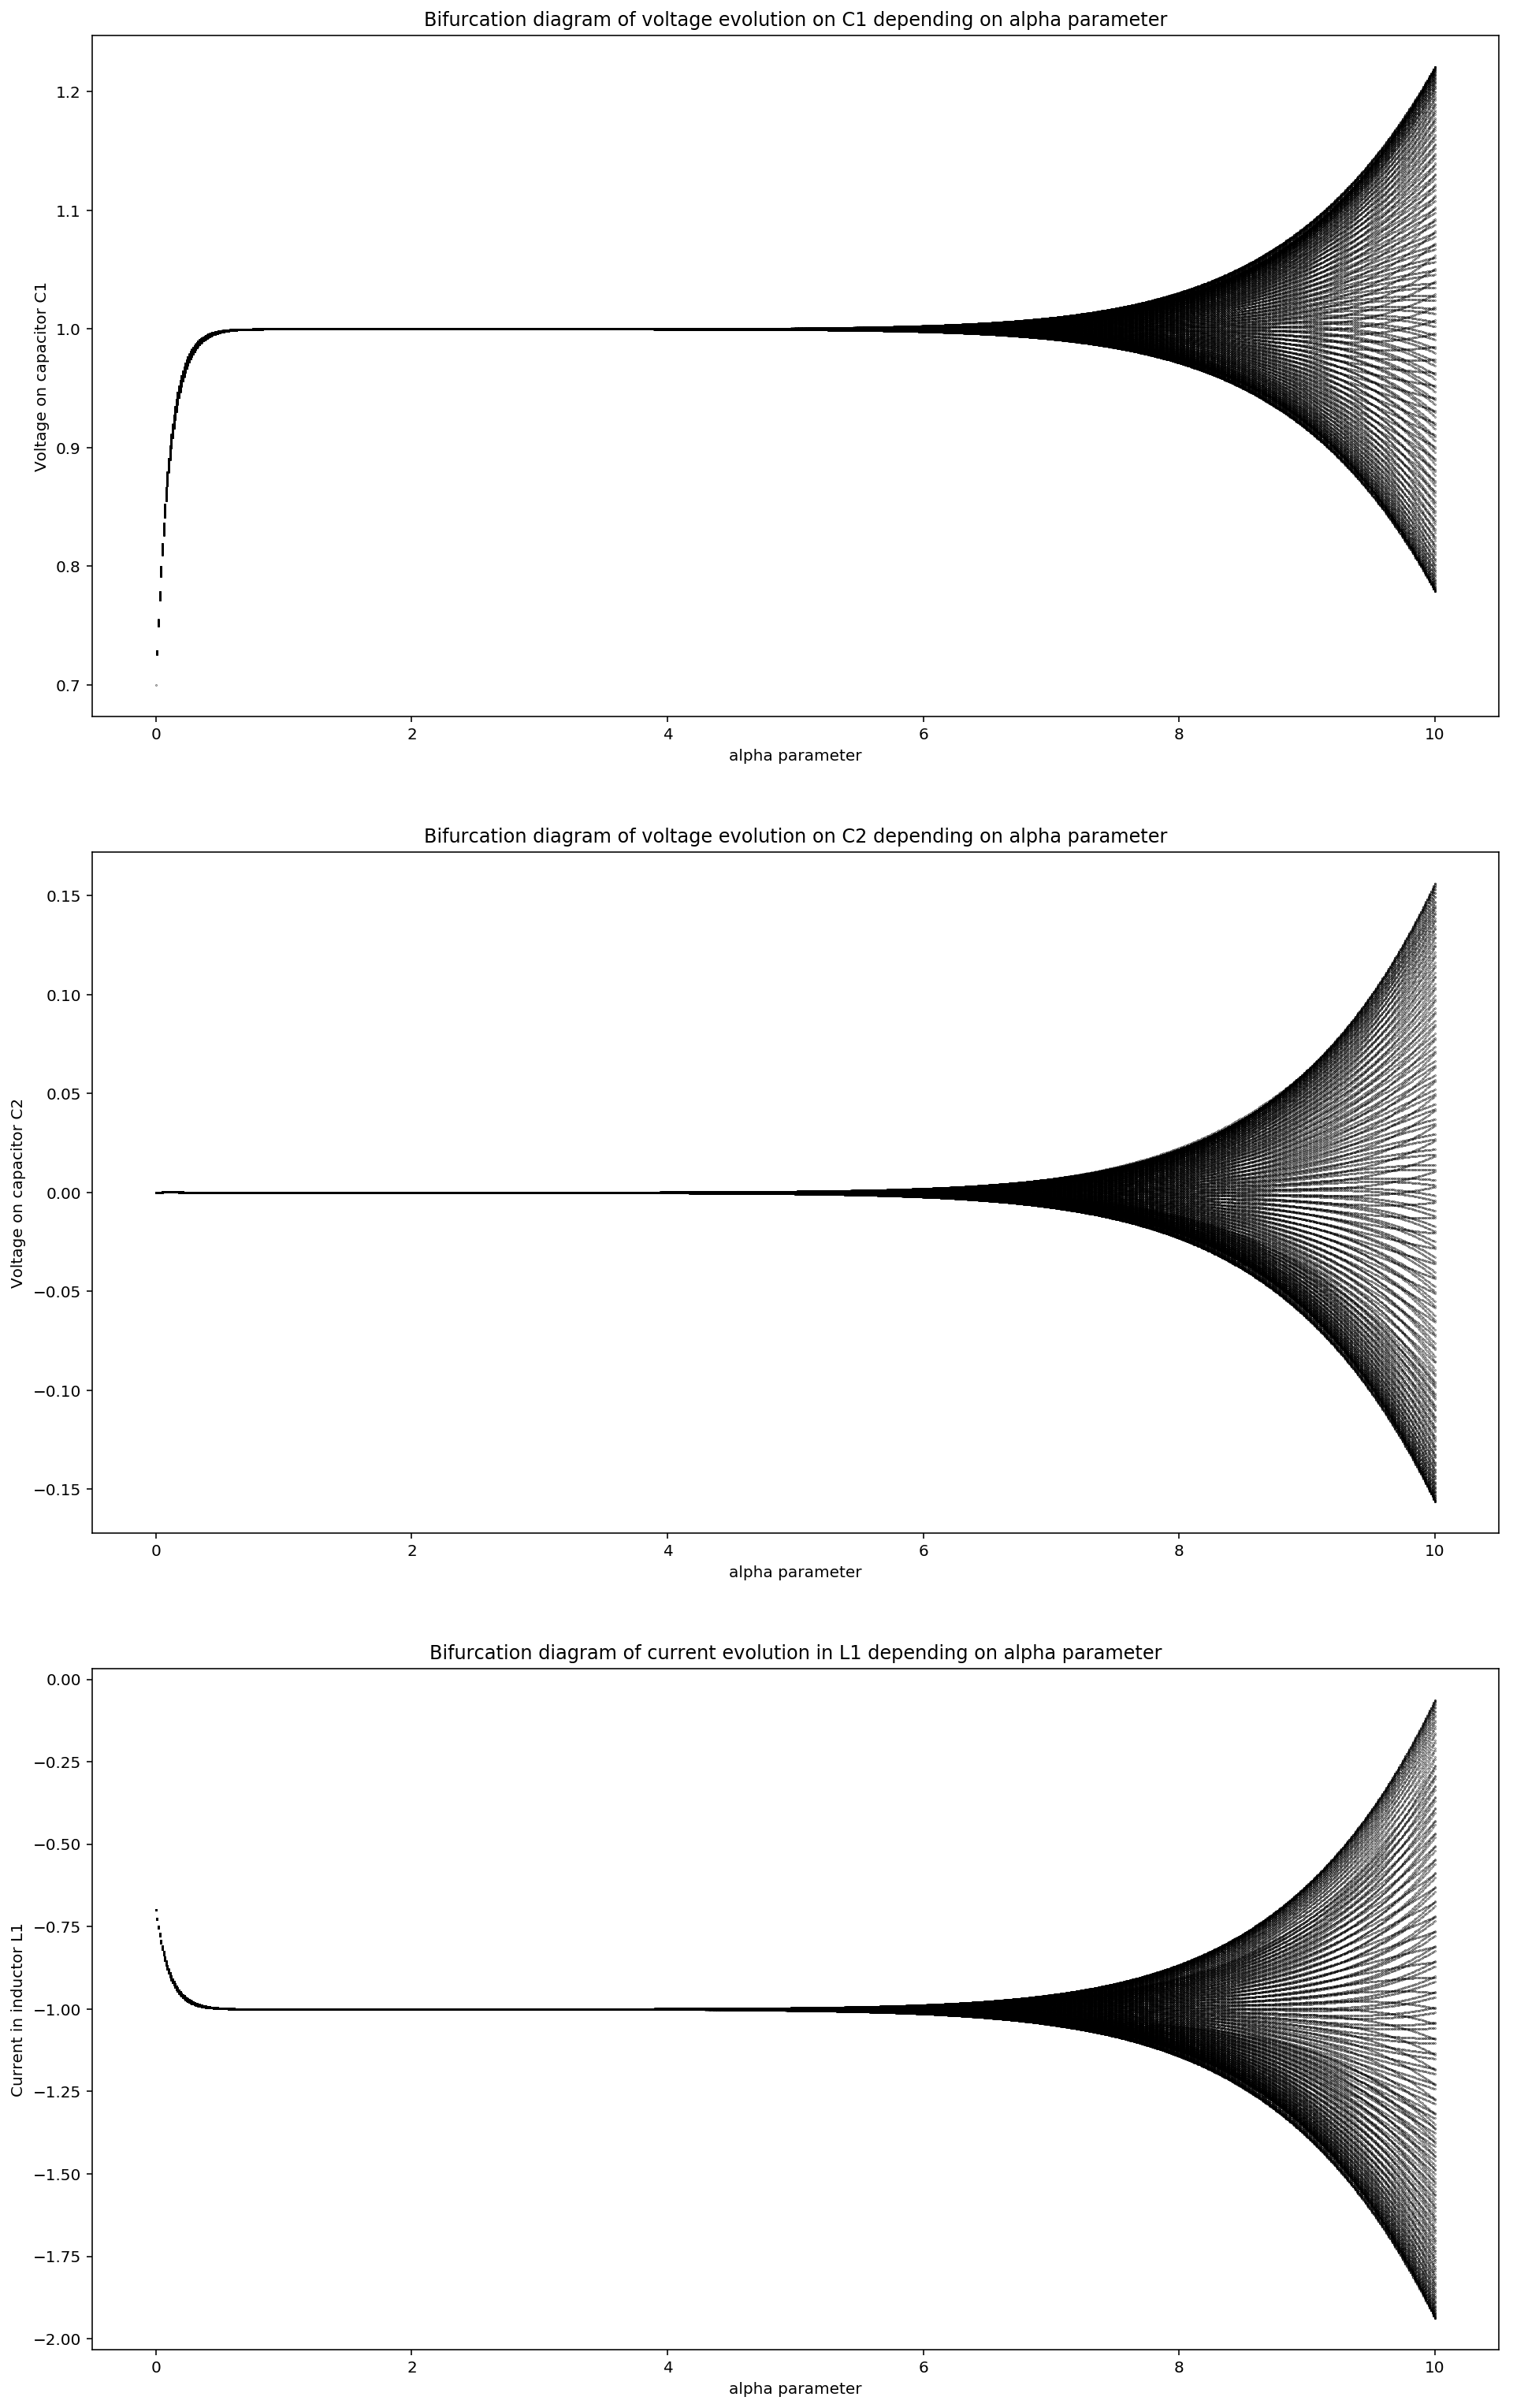

In [8]:
bifurcation(np.arange(0.0, 20.0, 0.01), 'alpha', np.linspace(0, 10, 1000), threshold=1800)

# Bifurcation diagram of system evolution depending on `beta` parameter

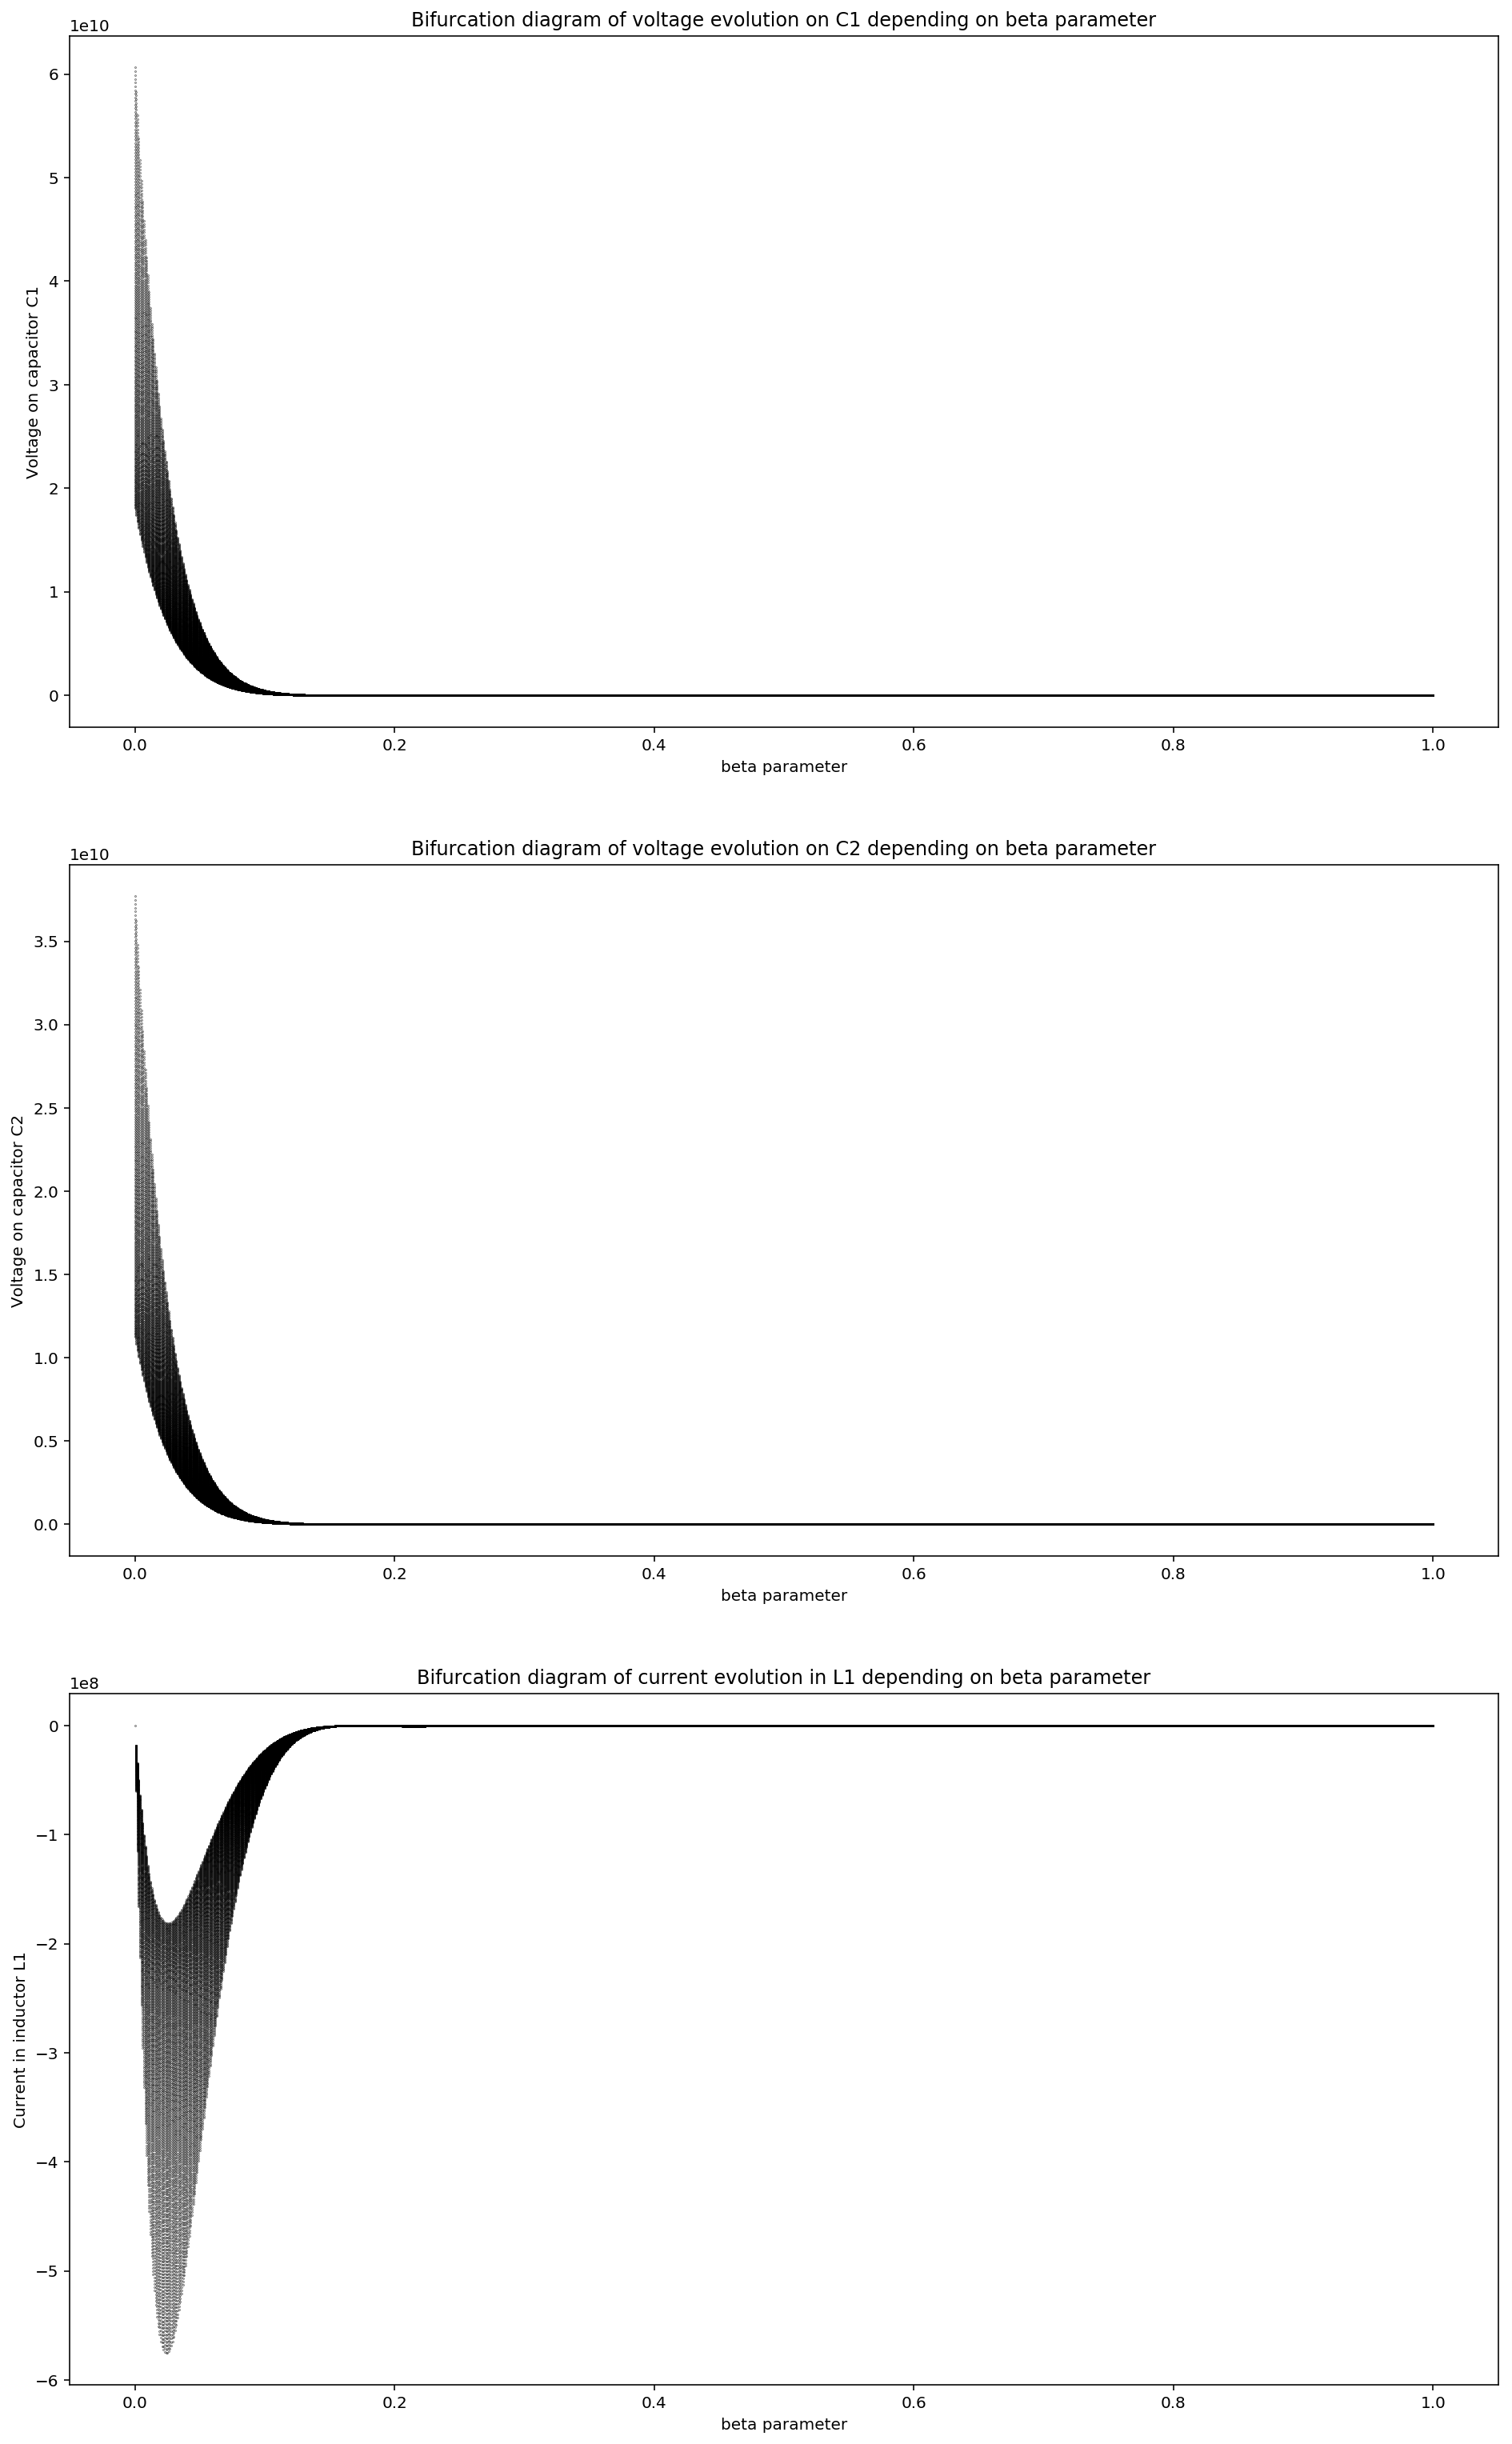

In [9]:
bifurcation(np.arange(0.0, 40.0, 0.01), 'beta', np.linspace(0, 1, 1000), threshold=3800, alpha=5)

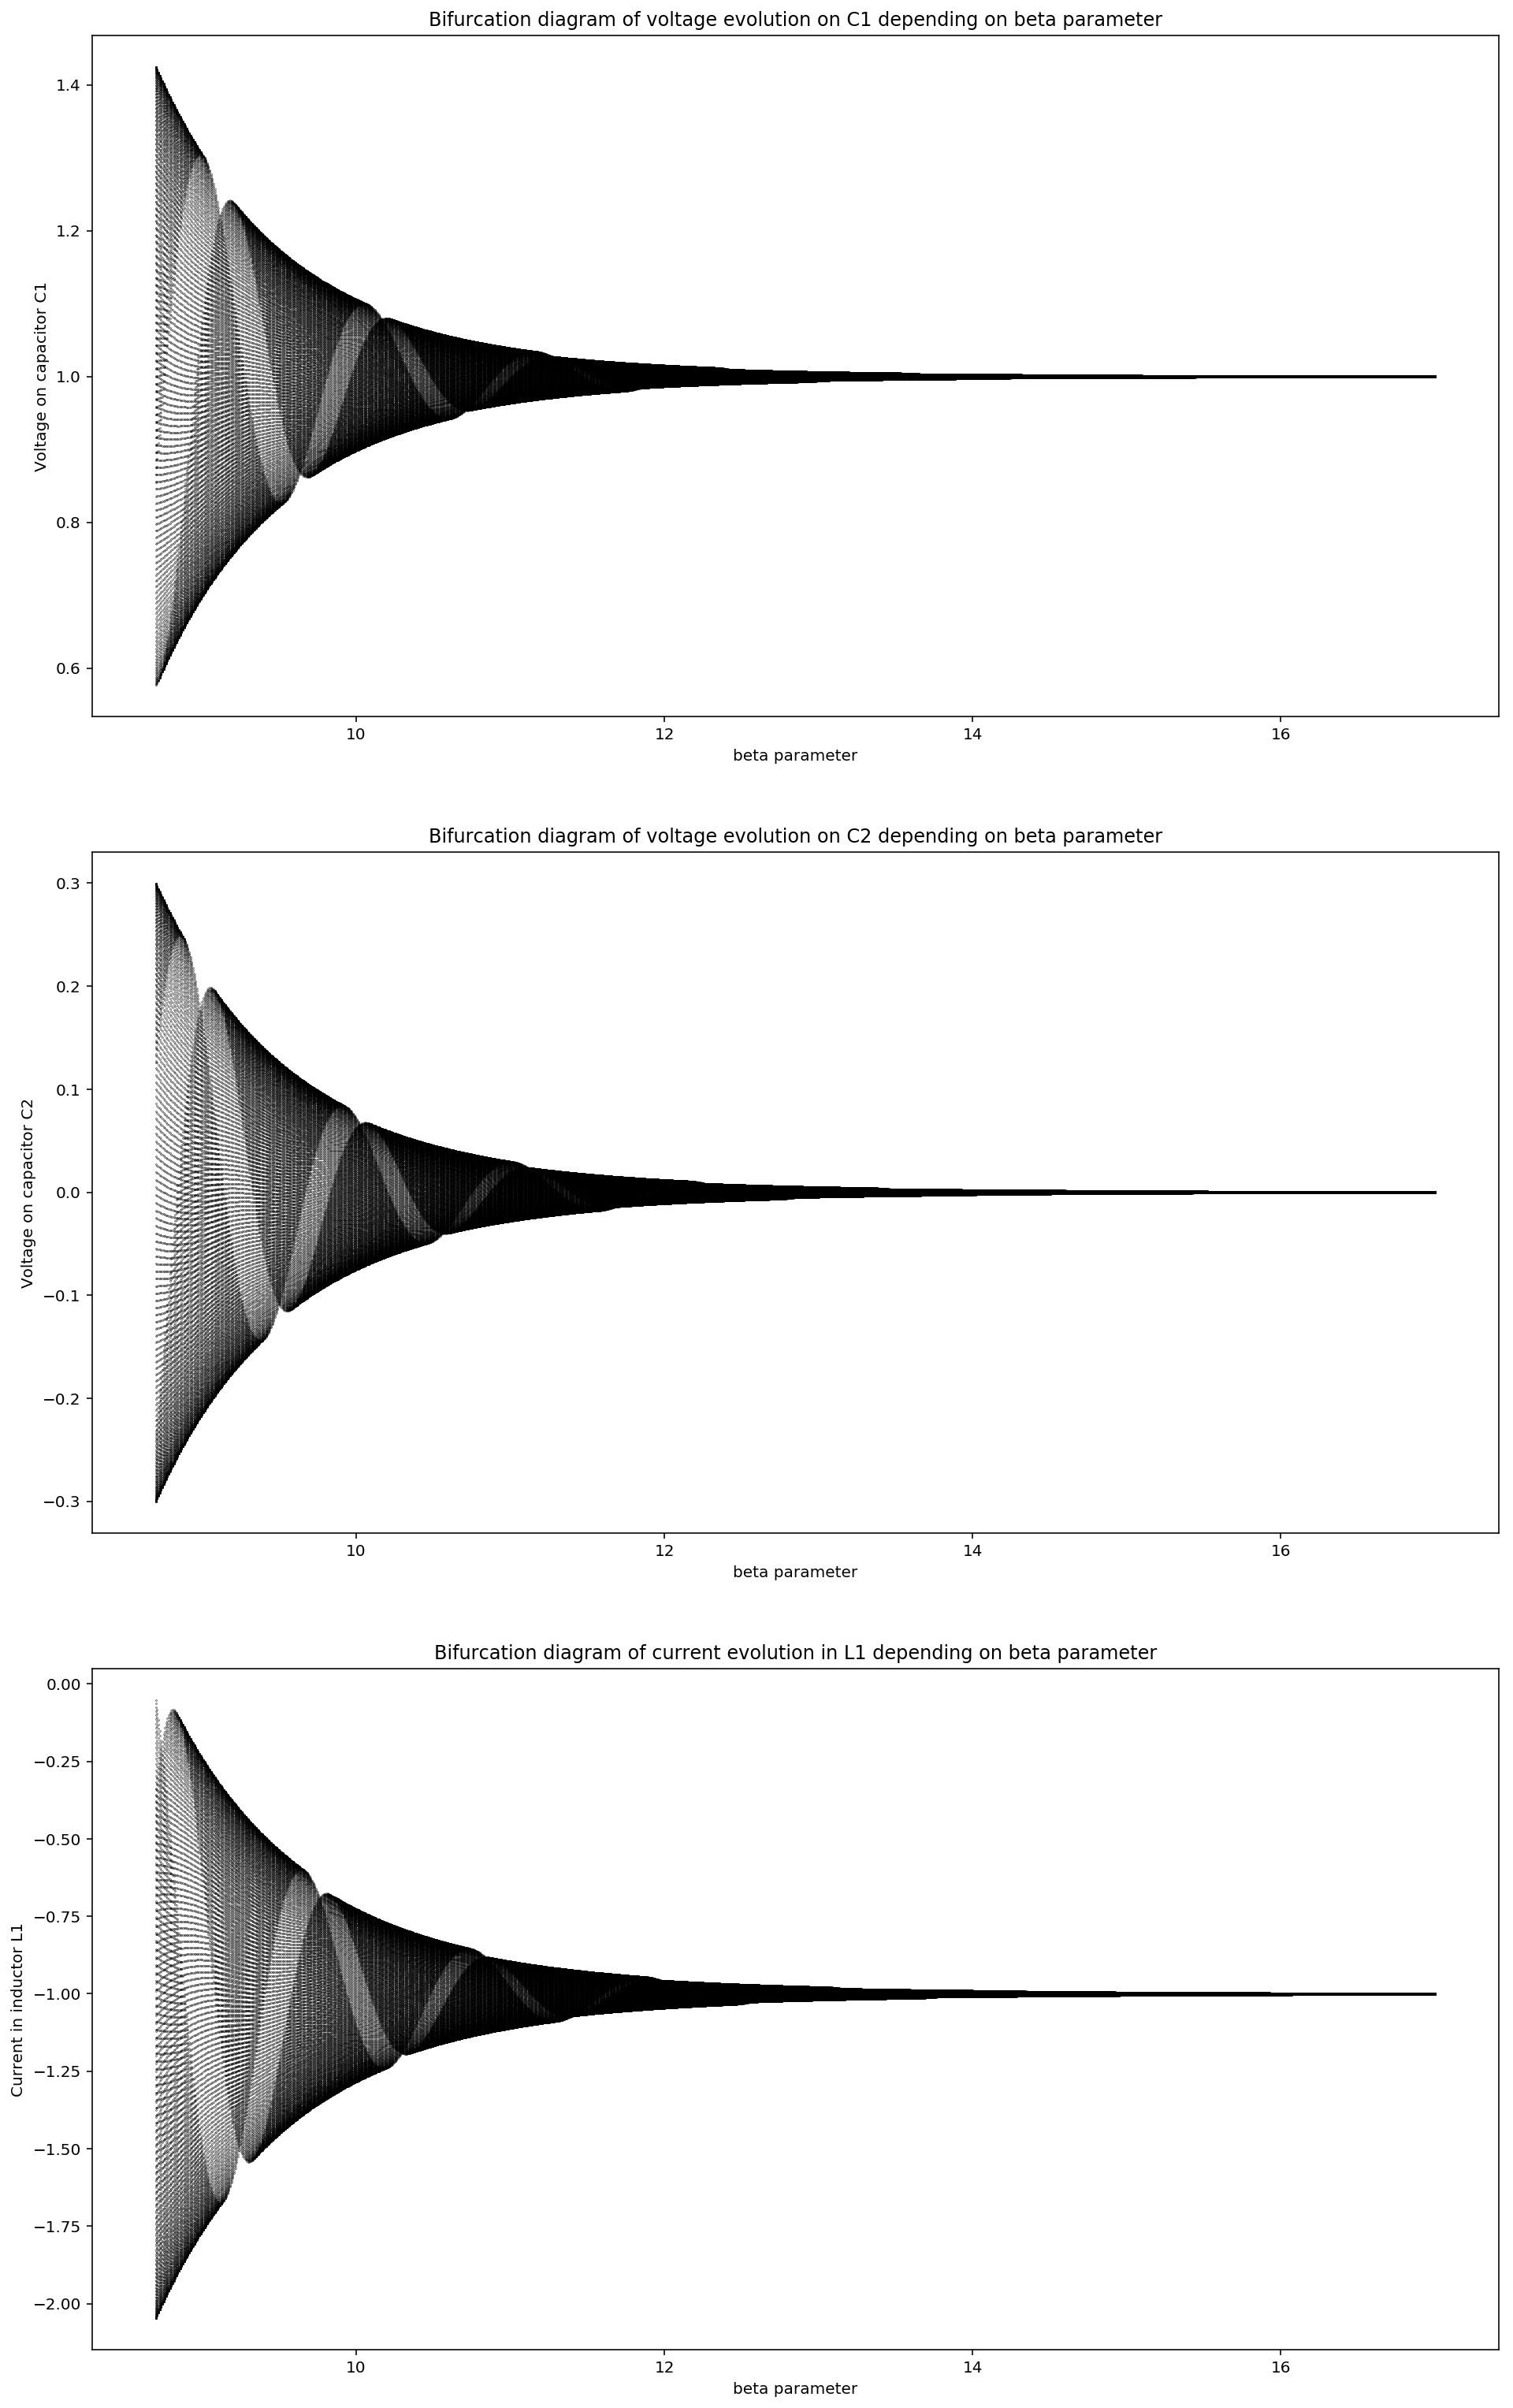

In [10]:
bifurcation(np.arange(0.0, 40.0, 0.01), 'beta', np.linspace(8.7, 17, 1000), threshold=3800, alpha=5)

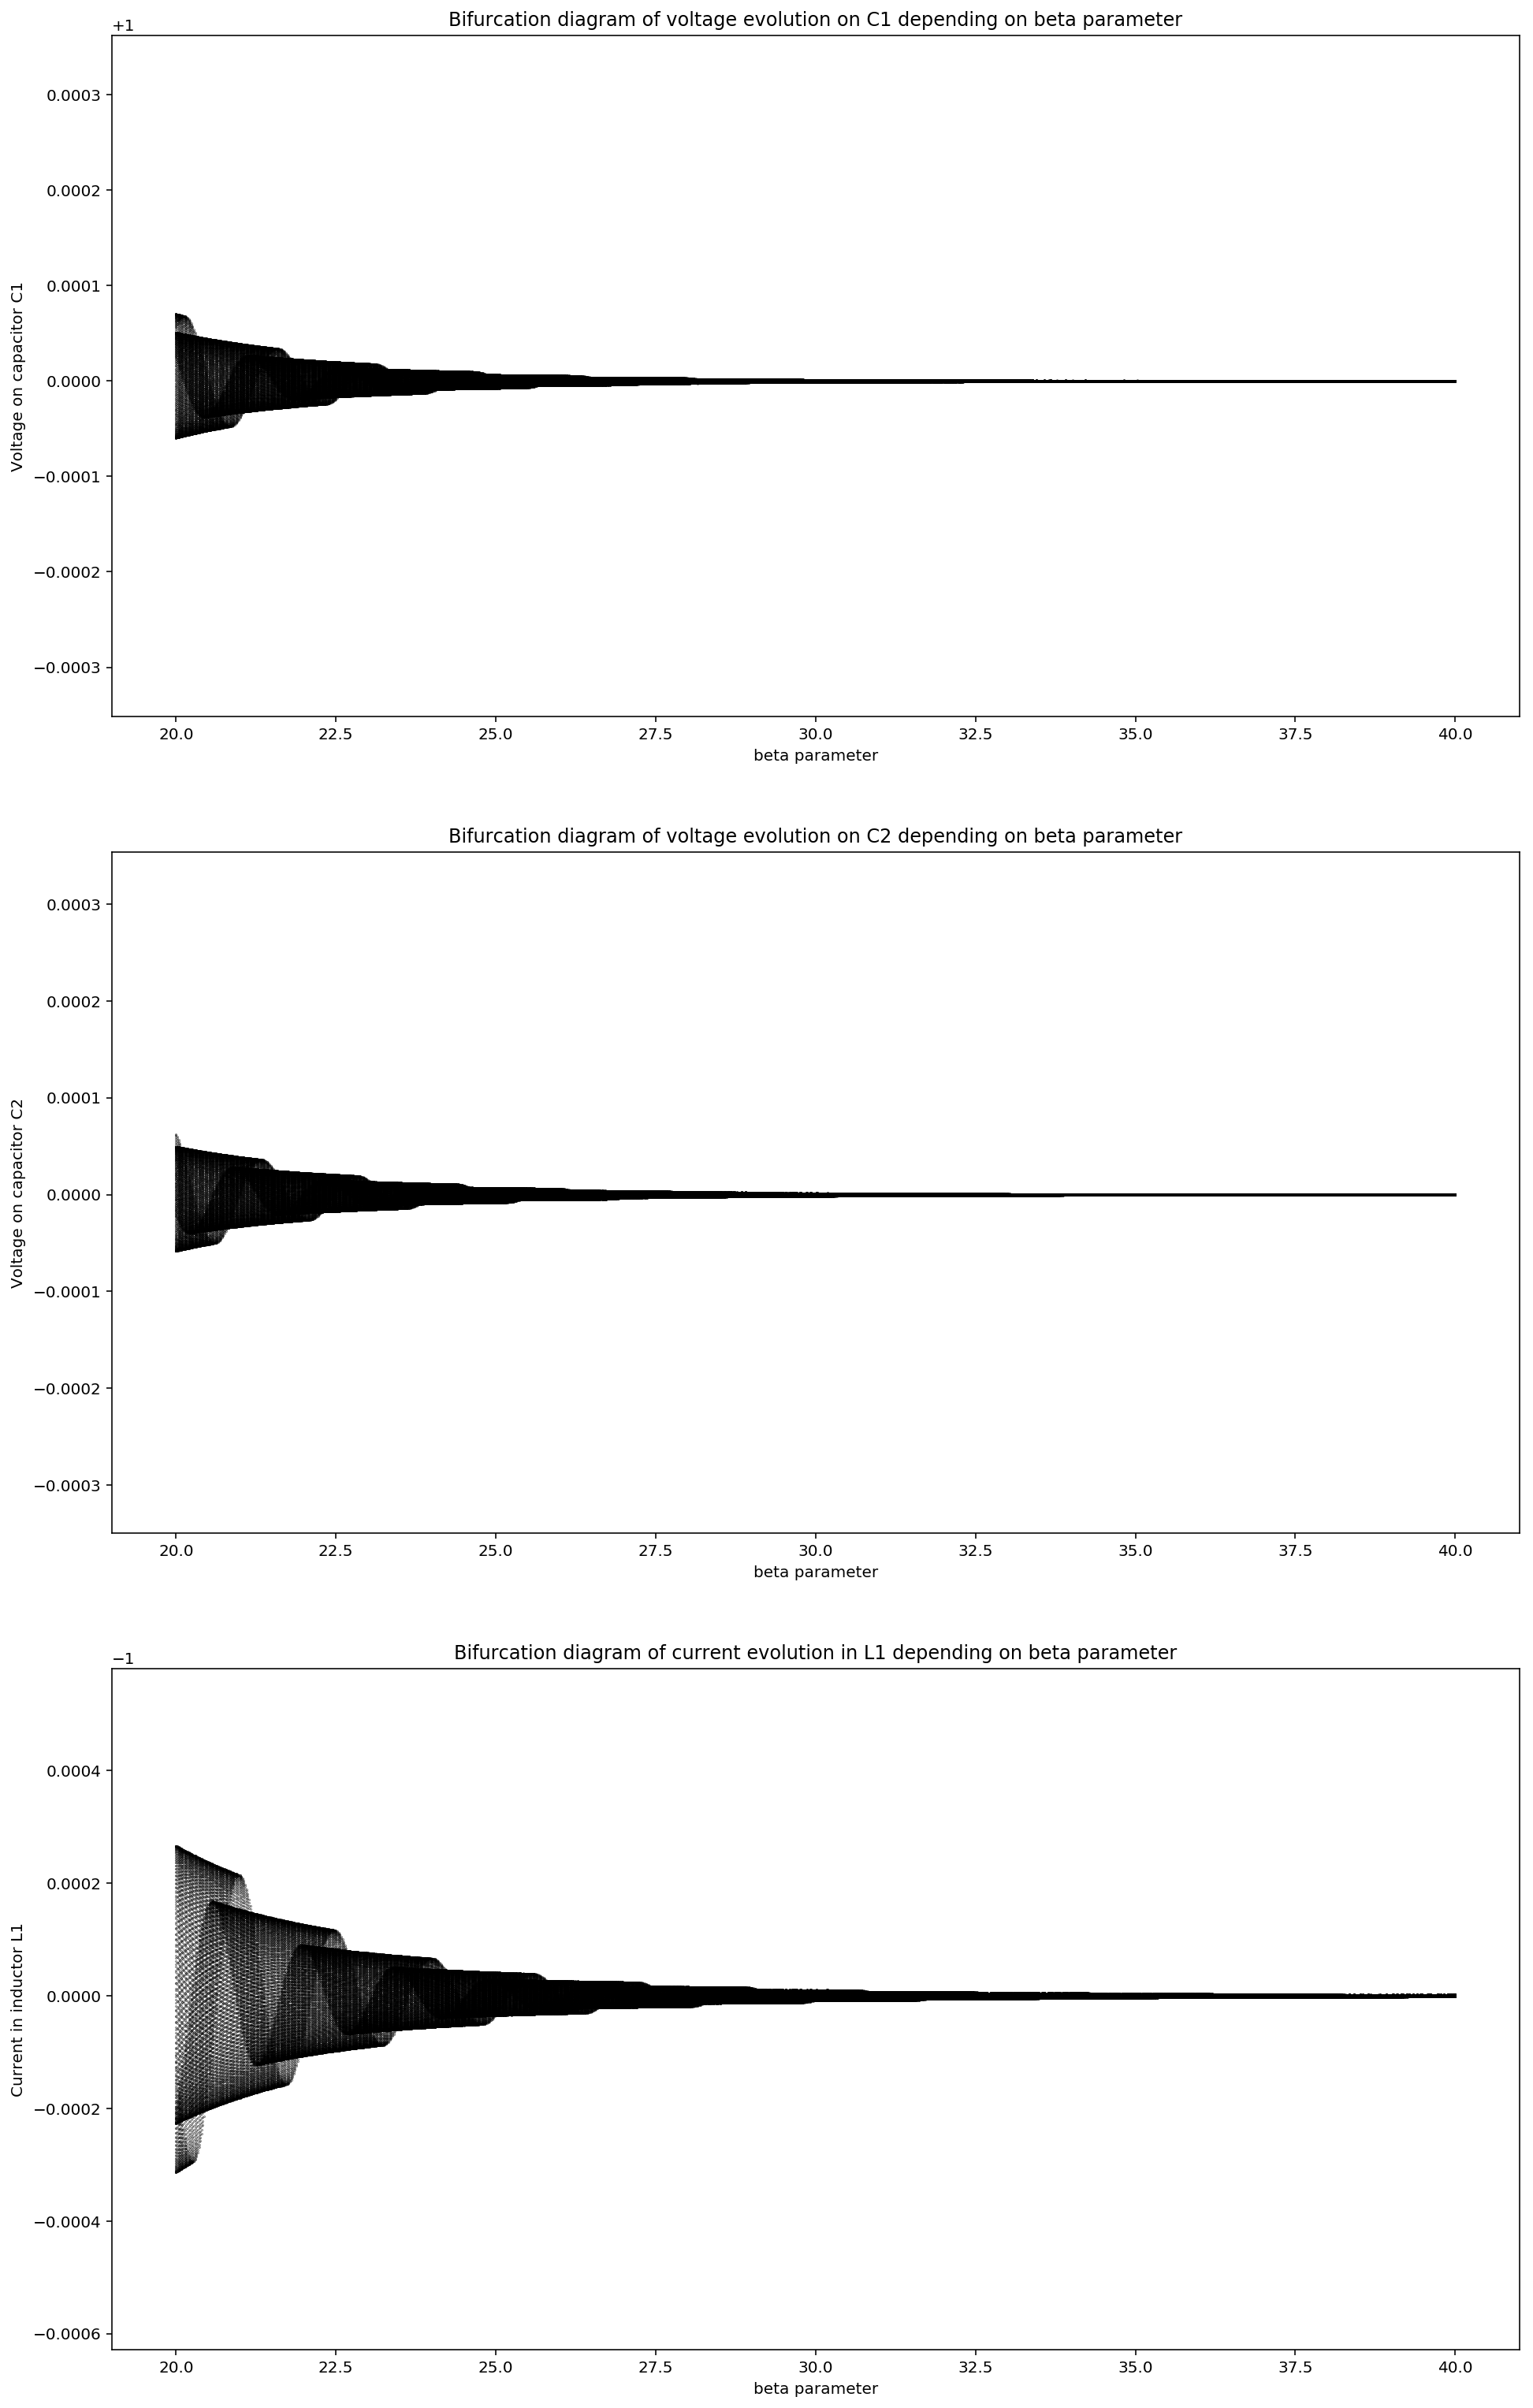

In [19]:
bifurcation(np.arange(0.0, 40.0, 0.01), 'beta', np.linspace(20, 40, 1000), threshold=3800, alpha=5)